# Smoking Cessation Model using PySD

By Matt Stammers

- This is a recreation of the training Smoking Cessation model using PySD
- Version 1.1

You will need to install the dependencies as per the instructions for installing PySD https://pysd.readthedocs.io/en/master/installation.html 

In [7]:
# Firstly import the packages

import pysd
from IPython.display import Image
import matplotlib.pyplot as plt
import pandas as pd
model = pysd.read_xmile('Stella_Model/smoking cessation demo.stmx')

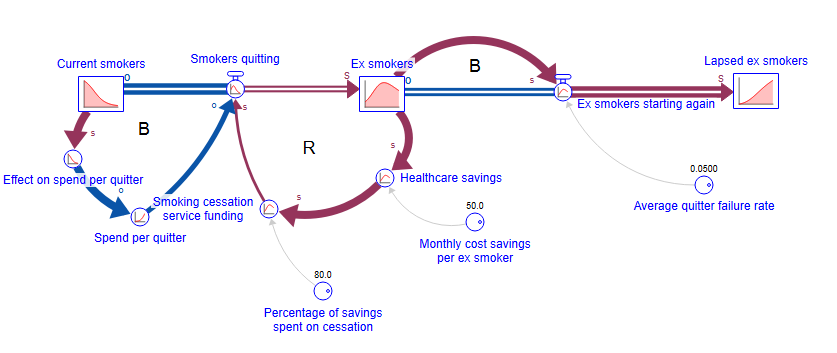

In [2]:
# Show image of final result

Image('Smoking_Cessation_Model.png')

In [4]:
# Here we plot the values in the model. You can see that the popluation is gradually getting smaller due to shortage of food

values = model.run()
values.head(12)

,INITIAL TIME,FINAL TIME,TIME STEP,SAVEPER,Effect on spend per quitter,Smokers quitting,Healthcare savings,Monthly cost savings per ex smoker,Smoking cessation service funding,Spend per quitter,Percentage of savings spent on cessation,Average quitter failure rate,Ex smokers starting again,Current smokers,Ex smokers,Lapsed ex smokers
0.00,0,36,0.25,0.25,1.000000,20.000000,5000.000000,50,4000.000000,200.000000,80,0.05,5.000000,900.000000,100.000000,0.000000
0.25,0,36,0.25,0.25,0.994444,20.634722,5187.500000,50,4150.000000,201.117318,80,0.05,5.187500,895.000000,103.750000,1.250000
0.50,0,36,0.25,0.25,0.988713,21.279429,5380.590278,50,4304.472222,202.283257,80,0.05,5.380590,889.841319,107.611806,2.546875
0.75,0,36,0.25,0.25,0.982802,21.933482,5579.325763,50,4463.460611,203.499867,80,0.05,5.579326,884.521462,111.586515,3.892023
1.00,0,36,0.25,0.25,0.976709,22.596173,5783.752712,50,4627.002170,204.769283,80,0.05,5.783753,879.038092,115.675054,5.286854
1.25,0,36,0.25,0.25,0.970432,23.266727,5993.907967,50,4795.126374,206.093722,80,0.05,5.993908,873.389048,119.878159,6.732792
1.50,0,36,0.25,0.25,0.963969,23.944296,6209.818205,50,4967.854564,207.475488,80,0.05,6.209818,867.572367,124.196364,8.231269
1.75,0,36,0.25,0.25,0.957318,24.627962,6431.499182,50,5145.199346,208.916973,80,0.05,6.431499,861.586293,128.629984,9.783724
2.00,0,36,0.25,0.25,0.950477,25.316734,6658.954972,50,5327.163978,210.420662,80,0.05,6.658955,855.429302,133.179099,11.391599
2.25,0,36,0.25,0.25,0.943445,26.009549,6892.177213,50,5513.741770,211.989135,80,0.05,6.892177,849.100118,137.843544,13.056337


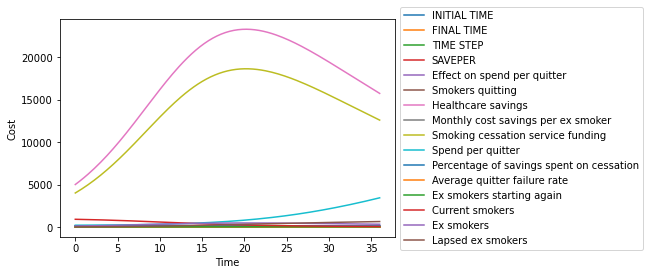

In [6]:
# Then we can plot all the variables of interest using matlplotlib

values.plot()
plt.ylabel('Cost')
plt.xlabel('Time')
plt.legend(loc='center left', bbox_to_anchor=(1,.5));

C:\ProgramData\Anaconda3\lib\site-packages\pysd\py_backend\model.py:1131: UserWarning: Replacing the equation of stockEx Smokers with params
  self.set_components(params)


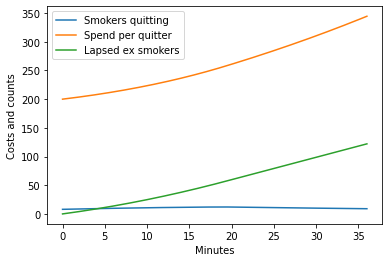

In [22]:
# Now to filter it down just to values of interest and a particular view

ex_smokers_series = pd.Series(index=range(20), data=range(40,80,2))
values = model.run(params={'Ex Smokers':ex_smokers_series},
                   return_columns=['Smokers quitting', 'Spend per quitter', 'Lapsed ex smokers'])
values.plot()
plt.ylabel('Costs and counts')
plt.xlabel('Minutes');

In [23]:
# If we want we can export the values to a .csv

values.to_csv('modelled_smoking_values.csv')